---
# <font color="DarkBlue"><b><center>Escuela Politécnica Nacional</center></b></font>
---
## <font color="DarkGreen"><center>Ransomware dynamics: Mitigating personal data exfiltration through the SCIRAS lens</font>

## <font color="DarkGreen"><center>T-SNE VISUALIZATION</font>

**Author:** David Cevallos-Salas, José Estrada-Jiménez, Danny S. Guamán, Luis Felipe Urquiza

**Date:** 2024-10-17

**Google Colab Link:**
https://colab.research.google.com/drive/1zV7ki9WaSRa7YTuaGOV0gjkrCMKbQteT

In [ ]:
# Importing libraries
from os import X_OK
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import zipfile
import os

In [ ]:
!git clone https://github.com/dcevallossalas/sanrap_sciras4

node = "win7"
y = np.array([])
first = True
first1 = True

families = os.listdir("/content/sanrap_sciras4/" + node + "/")

for family in families:
  annotations = os.listdir("/content/sanrap_sciras4/" + node + "/" + family)
  for annotation in annotations:
    files =  os.listdir("/content/sanrap_sciras4/" + node + "/" + family + "/" + annotation)
    for file in files:
      zipped = False
      if file.endswith(".zip"):
        zipped = True
        path1 = "/content/sanrap_sciras4/" + node + "/" + family + "/" + annotation + "/" + file
        path2 = "/home"
        with zipfile.ZipFile(path1, 'r') as zip_ref:
          zip_ref.extractall(path2)

        file = file.replace(".zip",".csv")

      if file.endswith("write.csv"):
        if zipped:
          data = pd.read_csv(path2 + "/original/win7-120gb-ssd/"+ family + "/" + annotation+"/" + file)
        else:
          data = pd.read_csv("/content/sanrap_sciras4/" + node + "/" + family + "/" + annotation+"/" + file)

        x1 = data.drop(data.columns[0],axis=1).to_numpy()

        if first:
          x = x1
          first = False
        else:
          x = np.concatenate((x,x1))

        n = len(x1)

        if annotation.startswith("TeslaCrypt"):
          code = 1
        elif annotation.startswith("WannaCry"):
          code = 2
        elif annotation.startswith("Cerber"):
          code = 3
        elif annotation.startswith("Gand"):
          code = 4
        elif annotation.startswith("Ryuk"):
          code = 5
        elif annotation.startswith("Sodi"):
          code = 6
        elif annotation.startswith("Dark"):
          code = 7
        else:
          code = 0

        if first1:
          y = np.full(n,code)
          first1 = False
        else:
          y = np.concatenate((y,np.full(n,code)))

# Number of categories
num_classes = 8

Cloning into 'sanrap_sciras4'...
remote: Enumerating objects: 384, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 384 (delta 1), reused 130 (delta 1), pack-reused 254 (from 1)
Receiving objects: 100% (384/384), 1.03 GiB | 19.92 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Updating files: 100% (240/240), done.


In [ ]:
# Representative random stratified sample
x, x2, y, y2 = train_test_split(x, y, train_size=0.06, shuffle=True, random_state = 1234, stratify=y)

# Splitting (training and test balanced sets definitions)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state = 1234, stratify = y)

In [ ]:
# Importing libraries
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

pipeline_tsne = Pipeline([
    ("scaler", StandardScaler()),
    ("tsne", TSNE(n_components=2, learning_rate="auto", init="random", perplexity=30, random_state=0))
])

x_visualize = pipeline_tsne.fit_transform(x)

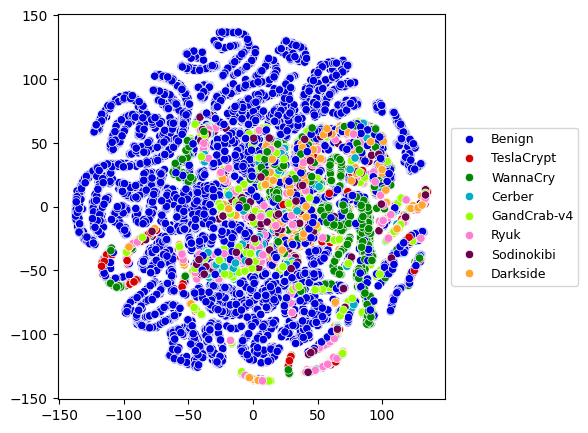

In [ ]:
# Palette
from colorcet import glasbey
palette = sns.color_palette(glasbey, num_classes)
palette1 = sns.color_palette(glasbey, 16)
palette[0] = palette1[10]
palette[1] = palette1[0]

# Malware families of ransomware
fig,ax=plt.subplots(1,1,figsize=(5,5))
sns.scatterplot(x = x_visualize[:,0]
                , y = x_visualize[:,1]
                , hue = y
                , palette = palette
                #, s = 50
                )

lg = plt.legend(loc="center right", bbox_to_anchor=(1.36, 0.5), prop = { "size": 9 })
lg.get_texts()[0].set_text("Benign")
lg.get_texts()[1].set_text("TeslaCrypt")
lg.get_texts()[2].set_text("WannaCry")
lg.get_texts()[3].set_text("Cerber")
lg.get_texts()[4].set_text("GandCrab-v4")
lg.get_texts()[5].set_text("Ryuk")
lg.get_texts()[6].set_text("Sodinokibi")
lg.get_texts()[7].set_text("Darkside")
plt.show()
